In [6]:
import os
import sqlite3
import pandas as pd

# Path to the main folder containing subfolders with databases
main_folder = 'data/original_dev/dev_databases'

# List all subfolders in the main folder
databases = [d for d in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, d))]

# Initialize a list to store the results
results = []

# Loop through each database subfolder
for db_name in databases:
    db_path = os.path.join(main_folder, db_name, f"{db_name}.sqlite")
    
    # Check if the SQLite file exists
    if os.path.exists(db_path):
        # Connect to the SQLite database
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        
        # Get the list of tables
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        num_tables = len(tables)
        
        # Initialize the count of columns
        num_columns = 0
        
        # Loop through each table to count columns
        for table in tables:
            table_name = table[0]
            cursor.execute(f"PRAGMA table_info(\"{table_name}\");")
            columns = cursor.fetchall()
            num_columns += len(columns)
        
        # Add the results to the list
        results.append({
            'Database': db_name,
            'Number of Tables': num_tables,
            'Number of Columns': num_columns
        })
        
        # Close the connection
        conn.close()

# Convert the results to a DataFrame and display it
df_results = pd.DataFrame(results)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_results)

                   Database  Number of Tables  Number of Columns
0   debit_card_specializing                 6                 23
1                 financial                 8                 55
2                 formula_1                14                 96
3        california_schools                 3                 89
4                card_games                 7                117
5       european_football_2                 8                201
6     thrombosis_prediction                 3                 64
7                toxicology                 4                 11
8              student_club                 8                 48
9                 superhero                10                 31
10       codebase_community                 8                 71


In [8]:

# List all subfolders in the main folder
databases = [d for d in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, d))]

# Initialize a list to store the results
results = []

# Loop through each database subfolder
for db_name in databases:
    db_path = os.path.join(main_folder, db_name, f"{db_name}.sqlite")
    
    # Check if the SQLite file exists
    if os.path.exists(db_path):
        # Connect to the SQLite database
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        
        # Get the list of tables, excluding 'sqlite_sequence'
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name != 'sqlite_sequence';")
        tables = cursor.fetchall()
        num_tables = len(tables)
        
        # Initialize the count of columns
        num_columns = 0
        
        # Loop through each table to count columns
        for table in tables:
            table_name = table[0]
            cursor.execute(f"PRAGMA table_info(\"{table_name}\");")
            columns = cursor.fetchall()
            num_columns += len(columns)
        
        # Add the results to the list
        results.append({
            'Database': db_name,
            'Number of Tables': num_tables,
            'Number of Columns': num_columns
        })
        
        # Close the connection
        conn.close()

# Convert the results to a DataFrame
df = pd.DataFrame(results)

# Calculate totals
total_tables = df['Number of Tables'].sum()
total_columns = df['Number of Columns'].sum()

# Append the totals row to the DataFrame
totals_row = pd.DataFrame([['Total', total_tables, total_columns]], columns=df.columns)
df_with_totals = pd.concat([df, totals_row], ignore_index=True)

# Convert to LaTeX table with totals
latex_table_with_totals = df_with_totals.to_latex(index=False)

# Print LaTeX table
print(latex_table_with_totals)

\begin{tabular}{lrr}
\toprule
Database & Number of Tables & Number of Columns \\
\midrule
debit_card_specializing & 5 & 21 \\
financial & 8 & 55 \\
formula_1 & 13 & 94 \\
california_schools & 3 & 89 \\
card_games & 6 & 115 \\
european_football_2 & 7 & 199 \\
thrombosis_prediction & 3 & 64 \\
toxicology & 4 & 11 \\
student_club & 8 & 48 \\
superhero & 10 & 31 \\
codebase_community & 8 & 71 \\
Total & 75 & 798 \\
\bottomrule
\end{tabular}



In [16]:
import pandas as pd

# Path to the Excel file
file_path = 'annotations/Difficulty Annotation.xlsx'

# Read the specific sheet from the Excel file
df = pd.read_excel(file_path, sheet_name='Sammanställning')

# Group by database_name and Final difficulty, and count occurrences
difficulty_counts = df.groupby(['database_name', 'Final difficulty']).size().unstack(fill_value=0)



difficulty_counts


Final difficulty,Easy,Hard,Medium,Very Hard
database_name,,,,
california_schools,24,30,32,3
card_games,37,50,28,0
codebase_community,62,5,4,0
debit_card_specializing,17,1,3,0
european_football_2,34,103,62,0
financial,21,11,9,13
formula_1,49,10,35,0
student_club,39,0,9,0
superhero,30,0,1,0


In [128]:
import pandas as pd

# Path to the Excel file
file_path = 'annotations/Corrected_GOLD_BIRD_Annotations.xlsx'

# Read the sheets for each annotator
df_axel = pd.read_excel(file_path, sheet_name='Axel GOLD')
df_erik = pd.read_excel(file_path, sheet_name='Erik GOLD')

# Define all quality classes
quality_classes = ["No description", "I can't tell", "Incorrect", "Somewhat correct", "Almost Perfect", "Perfect"]

# Calculate the percentage of each quality class for Axel
axel_counts = df_axel['Annotation'].value_counts(normalize=True) * 100
axel_counts = axel_counts.reindex(quality_classes).fillna(0)

# Calculate the percentage of each quality class for Erik
erik_counts = df_erik['Annotation'].value_counts(normalize=True) * 100
erik_counts = erik_counts.reindex(quality_classes).fillna(0)

# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({
    'Annotator 1': axel_counts,
    'Annotator 2': erik_counts
})


# Calculate the mean percentage for each quality class
combined_counts['Mean Percentage'] = combined_counts.mean(axis=1)


combined_counts


,Annotator 1,Annotator 2,Mean Percentage
Annotation,,,
No description,3.258145,2.882206,3.070175
I can't tell,5.513784,9.022556,7.268170
Incorrect,0.125313,0.000000,0.062657
Somewhat correct,13.784461,23.809524,18.796992
Almost Perfect,0.000000,0.000000,0.000000
Perfect,77.318296,64.285714,70.802005


In [36]:
import pandas as pd

# Load the Excel file
file_path = 'annotations/LLM Prediction Annotations(11).xlsx'
sheets = ['Forsberg', 'Oscar']

# Read the sheets into separate dataframes
df_hjalmar = pd.read_excel(file_path, sheet_name=sheets[0])
df_sorme = pd.read_excel(file_path, sheet_name=sheets[1])

# Extract the annotation columns
annotations_hjalmar = df_hjalmar['Annotation LLM 3']
annotations_sorme = df_sorme['Annotation LLM 3']

# Calculate the mean number of annotations in each class
mean_annotations_hjalmar = annotations_hjalmar.value_counts(normalize=True)
mean_annotations_sorme = annotations_sorme.value_counts(normalize=True)

# Combine the means into a single dataframe
mean_annotations = pd.concat([mean_annotations_hjalmar, mean_annotations_sorme], axis=1)
mean_annotations.columns = ['Forsberg', 'Oscar']

# Calculate the overall percentage between the classes
overall_percentage = mean_annotations.mean(axis=1) * 100

# Display the results
mean_annotations, overall_percentage


(                     Forsberg     Oscar
 Annotation LLM 3                       
 4. Perfect           0.775689  0.723058
 No description       0.068922  0.068922
 3. Almost perfect    0.062657  0.100251
 2. Somewhat correct  0.050125  0.072682
 1. Incorrect         0.042607  0.035088,
 Annotation LLM 3
 4. Perfect             74.937343
 No description          6.892231
 3. Almost perfect       8.145363
 2. Somewhat correct     6.140351
 1. Incorrect            3.884712
 dtype: float64)

In [57]:
import pandas as pd

data = pd.read_excel('annotations/LLM Prediction Annotations(13).xlsx', sheet_name="Scores 456")

# Filter the relevant columns
data_filtered = data[['Annotation 1 LLM 6', 'Annotation 2 LLM 6', 'Final difficulty']]

# Convert the annotations to numeric values
annotation_mapping = {
    "4. Perfect": 4,
    "3. Almost perfect": 3,
    "2. Somewhat correct": 2,
    "1. Incorrect": 1
}

data_filtered['Annotation 1 LLM 1'] = data_filtered['Annotation 1 LLM 6'].map(annotation_mapping)
data_filtered['Annotation 2 LLM 1'] = data_filtered['Annotation 2 LLM 6'].map(annotation_mapping)

# Calculate the average annotation per difficulty
data_filtered['Average Quality'] = data_filtered[['Annotation 1 LLM 1', 'Annotation 2 LLM 1']].mean(axis=1)

# Group by difficulty and calculate the mean quality
difficulty_quality = data_filtered.groupby('Final difficulty')['Average Quality'].mean().reset_index()

latex_table = difficulty_quality.to_latex(index=False)

# Display the LaTeX table code
print(latex_table)

\begin{tabular}{lr}
\toprule
Final difficulty & Average Quality \\
\midrule
Easy & 3.827298 \\
Hard & 3.458333 \\
Medium & 3.655367 \\
Very Hard & 1.928571 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1321833/3452089770.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Annotation 1 LLM 1'] = data_filtered['Annotation 1 LLM 6'].map(annotation_mapping)
/tmp/ipykernel_1321833/3452089770.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Annotation 2 LLM 1'] = data_filtered['Annotation 2 LLM 6'].map(annotation_mapping)
/tmp/ipykernel_1321833/3452089770.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

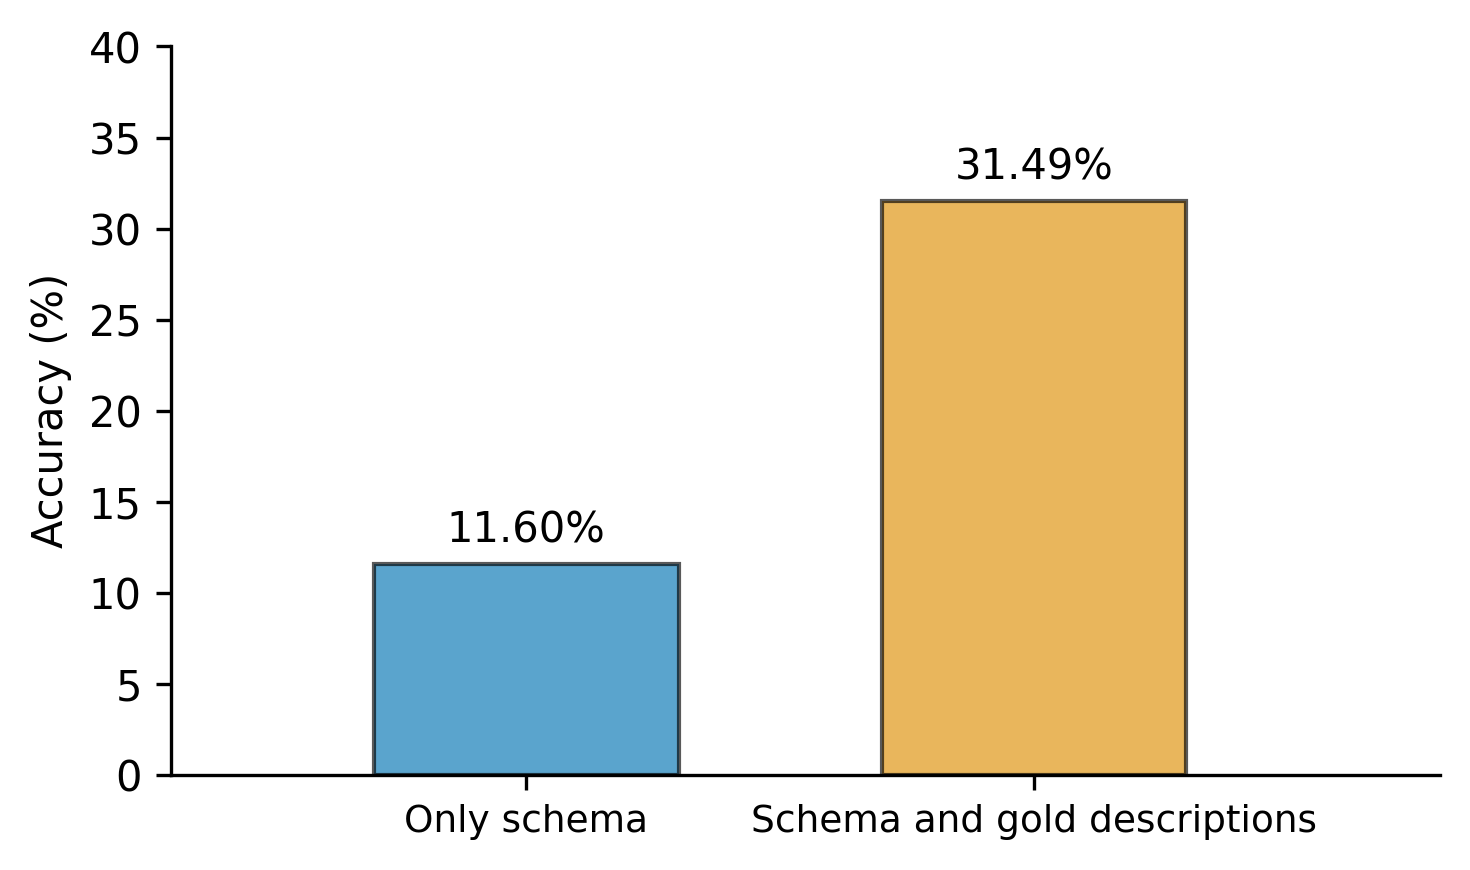

In [126]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

# Data for the new plot
data_new = {
    'Only schema': [11.60],
    'Schema and gold descriptions': [31.49]
}

df_new = pd.DataFrame(data_new, index=['Execution accuracy'])

# Creating the bar plot with accuracy numbers displayed on top of each bar and added spacing
fig, ax = plt.subplots(figsize=(5, 3))

# Adding spacing between bars by using width and positions
bar_width = 0.6
bar_positions = [i + 0.7 for i in range(len(df_new.columns))]  # Center the bars

bars = ax.bar(bar_positions, df_new.loc['Execution accuracy'], width=bar_width, color=colors, edgecolor="black", alpha=0.65)
# ax.set_title('Execution accuracy')
ax.set_ylim([0, 40])
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_new.columns, rotation=0, ha="center", fontsize=9)  # Making text below the bars smaller

# Adding the accuracy number on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Adding space to the right and left of the bars
ax.set_xlim([0, len(df_new.columns) + 0.5])


# Removing the "black box" around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()


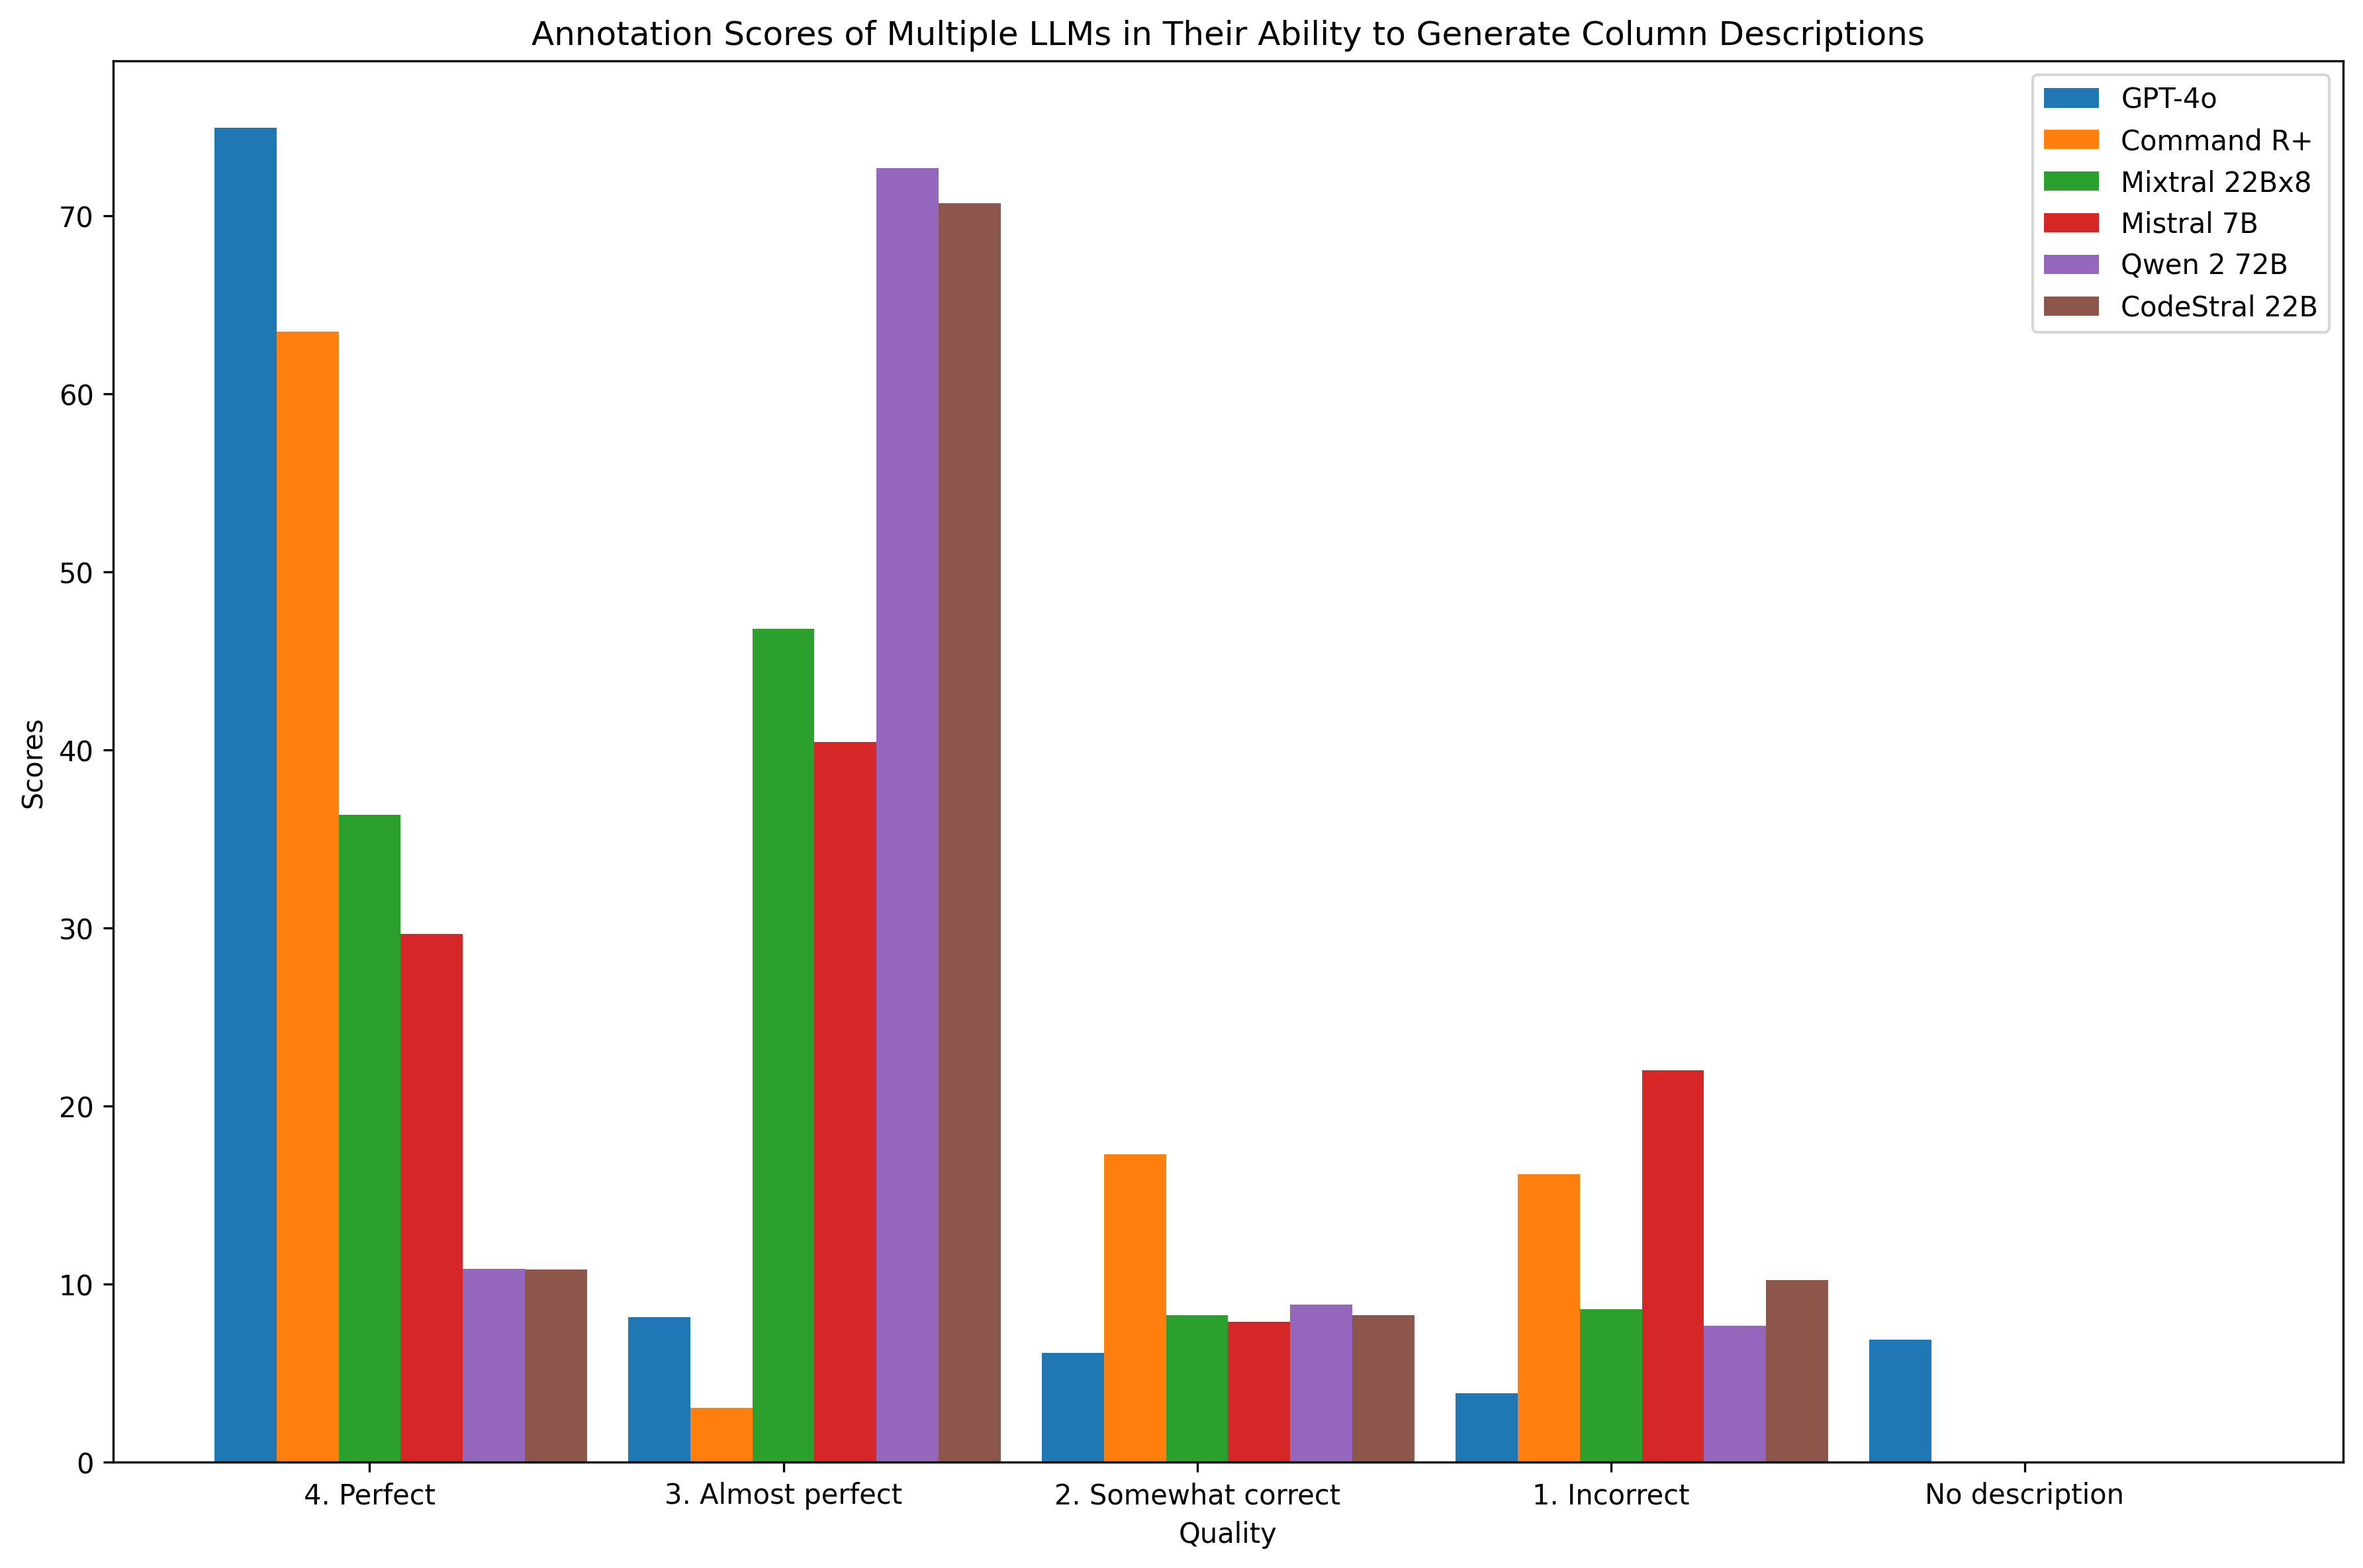

In [130]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['figure.dpi'] = 300

# Data from the table
labels = ["4. Perfect", "3. Almost perfect", "2. Somewhat correct", "1. Incorrect", "No description"]
GPT_4o = [74.94, 8.15, 6.14, 3.88, 6.89]
Command_R_plus = [63.47, 3.07, 17.29, 16.17, 0]
Mixtral_22Bx8 = [36.34, 46.80, 8.27, 8.58, 0]
Mistral_7B = [29.65, 40.44, 7.90, 22.01, 0]
Qwen_2_72B = [10.85, 72.67, 8.84, 7.65, 0]
CodeStral_22B = [10.84, 70.68, 8.27, 10.21, 0]

# Convert data to numpy array for easier handling
data = np.array([GPT_4o, Command_R_plus, Mixtral_22Bx8, Mistral_7B, Qwen_2_72B, CodeStral_22B])
models = ["GPT-4o", "Command R+", "Mixtral 22Bx8", "Mistral 7B", "Qwen 2 72B", "CodeStral 22B"]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - 2*width, GPT_4o, width, label='GPT-4o')
rects2 = ax.bar(x - width, Command_R_plus, width, label='Command R+')
rects3 = ax.bar(x, Mixtral_22Bx8, width, label='Mixtral 22Bx8')
rects4 = ax.bar(x + width, Mistral_7B, width, label='Mistral 7B')
rects5 = ax.bar(x + 2*width, Qwen_2_72B, width, label='Qwen 2 72B')
rects6 = ax.bar(x + 3*width, CodeStral_22B, width, label='CodeStral 22B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Quality')
ax.set_ylabel('Scores')
ax.set_title('Annotation Scores of Multiple LLMs in Their Ability to Generate Column Descriptions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


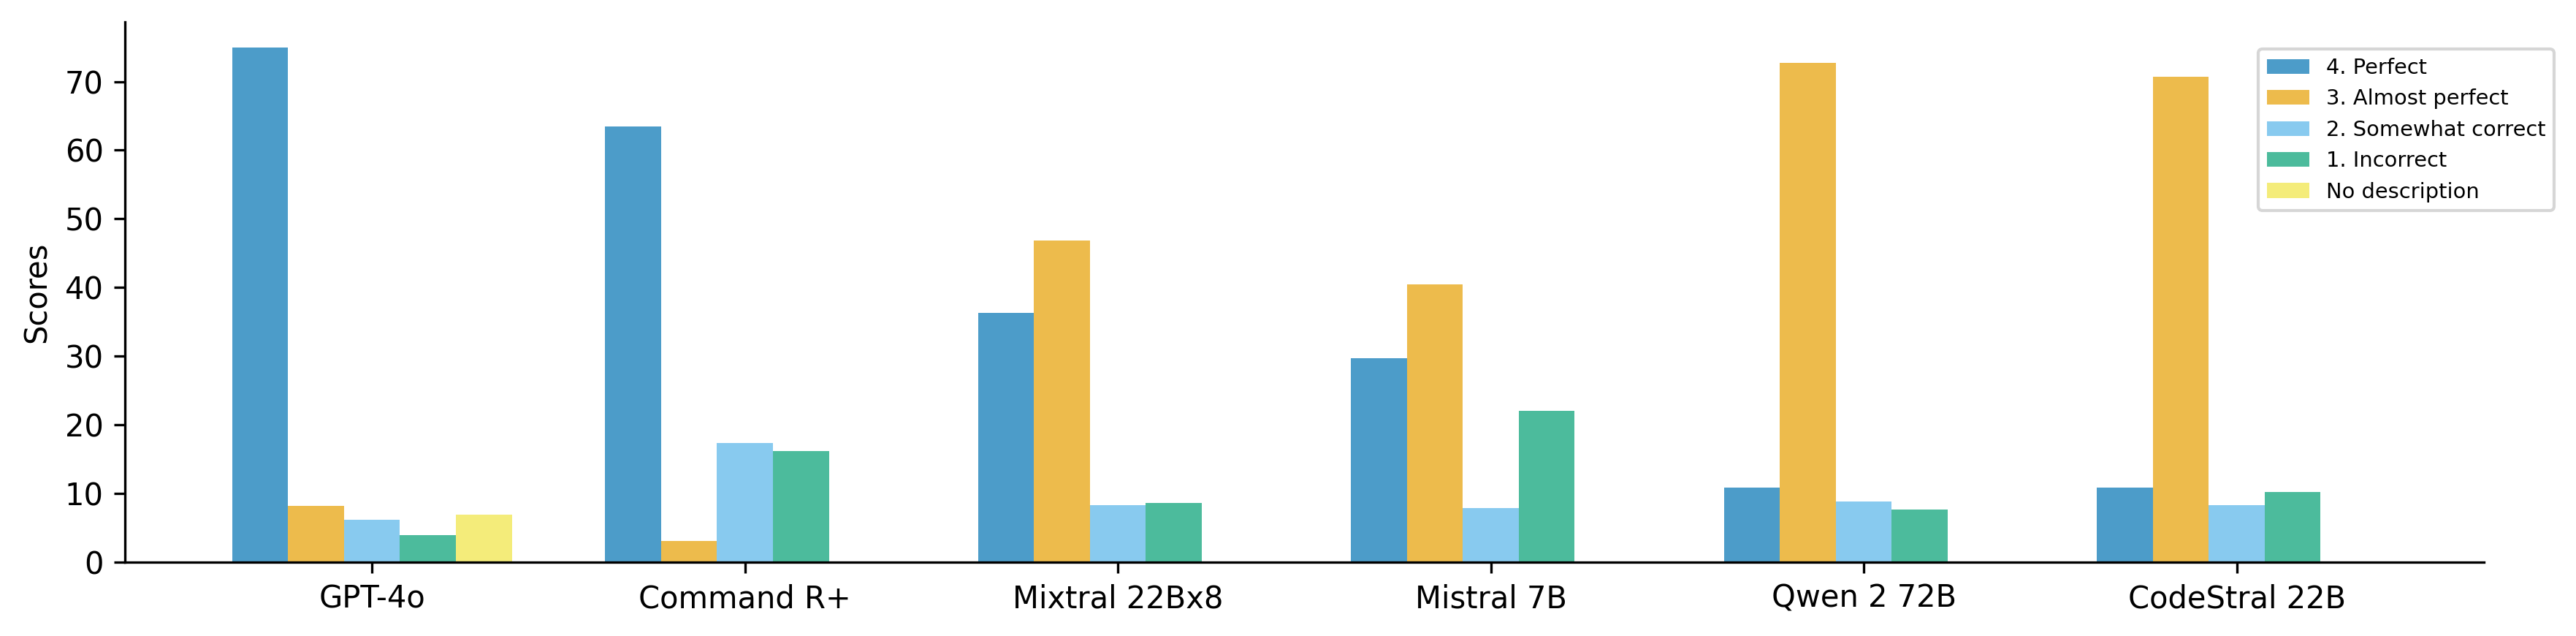

In [160]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['figure.dpi'] = 300

# Reorganize data for the new plot structure
GPT_4o = [74.94, 8.15, 6.14, 3.88, 6.89]
Command_R_plus = [63.47, 3.07, 17.29, 16.17, 0]
Qwen_2_72B = [10.85, 72.67, 8.84, 7.65, 0]
CodeStral_22B = [10.84, 70.68, 8.27, 10.21, 0]
Mixtral_22Bx8 = [36.34, 46.80, 8.27, 8.58, 0]
Mistral_7B = [29.65, 40.44, 7.90, 22.01, 0]


# Convert data to numpy array for easier handling
data = np.array([GPT_4o, Command_R_plus, Qwen_2_72B, CodeStral_22B, Mixtral_22Bx8, Mistral_7B])
models = ["GPT-4o", "Command R+", "Qwen 2 72B", "CodeStral 22B", "Mixtral 22Bx8", "Mistral 7B"]


qualities = ["4. Perfect", "3. Almost perfect", "2. Somewhat correct", "1. Incorrect", "No description"]
data_transposed = data.T  # Transpose the data to switch rows and columns


x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

# Color palette suitable for colorblind individuals
# colors = ['#88CCEE', '#44AA99', '#117733', '#DDCC77', '#CC6677']
colors = ['#0072B2', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#D55E00', '#CC79A7']
alpha_value = 0.7

fig, ax = plt.subplots(figsize=(12, 3))
rects1 = ax.bar(x - 2*width, data_transposed[0], width, label='4. Perfect', color=colors[0], alpha=alpha_value)
rects2 = ax.bar(x - width, data_transposed[1], width, label='3. Almost perfect', color=colors[1], alpha=alpha_value)
rects3 = ax.bar(x, data_transposed[2], width, label='2. Somewhat correct', color=colors[2], alpha=alpha_value)
rects4 = ax.bar(x + width, data_transposed[3], width, label='1. Incorrect', color=colors[3], alpha=alpha_value)
rects5 = ax.bar(x + 2*width, data_transposed[4], width, label='No description', color=colors[4], alpha=alpha_value)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_xlabel('LLMs')
ax.set_ylabel('Scores')
# ax.set_title('Annotation Scores of Multiple LLMs in Their Ability to Generate Column Descriptions')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.8), fontsize='x-small')

# # Set background color
# ax.set_facecolor('#f0f0f0')
# fig.patch.set_facecolor('#f0f0f0')
# Set background color only inside the axes
# ax.set_facecolor('#d9d9d9')

fig.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


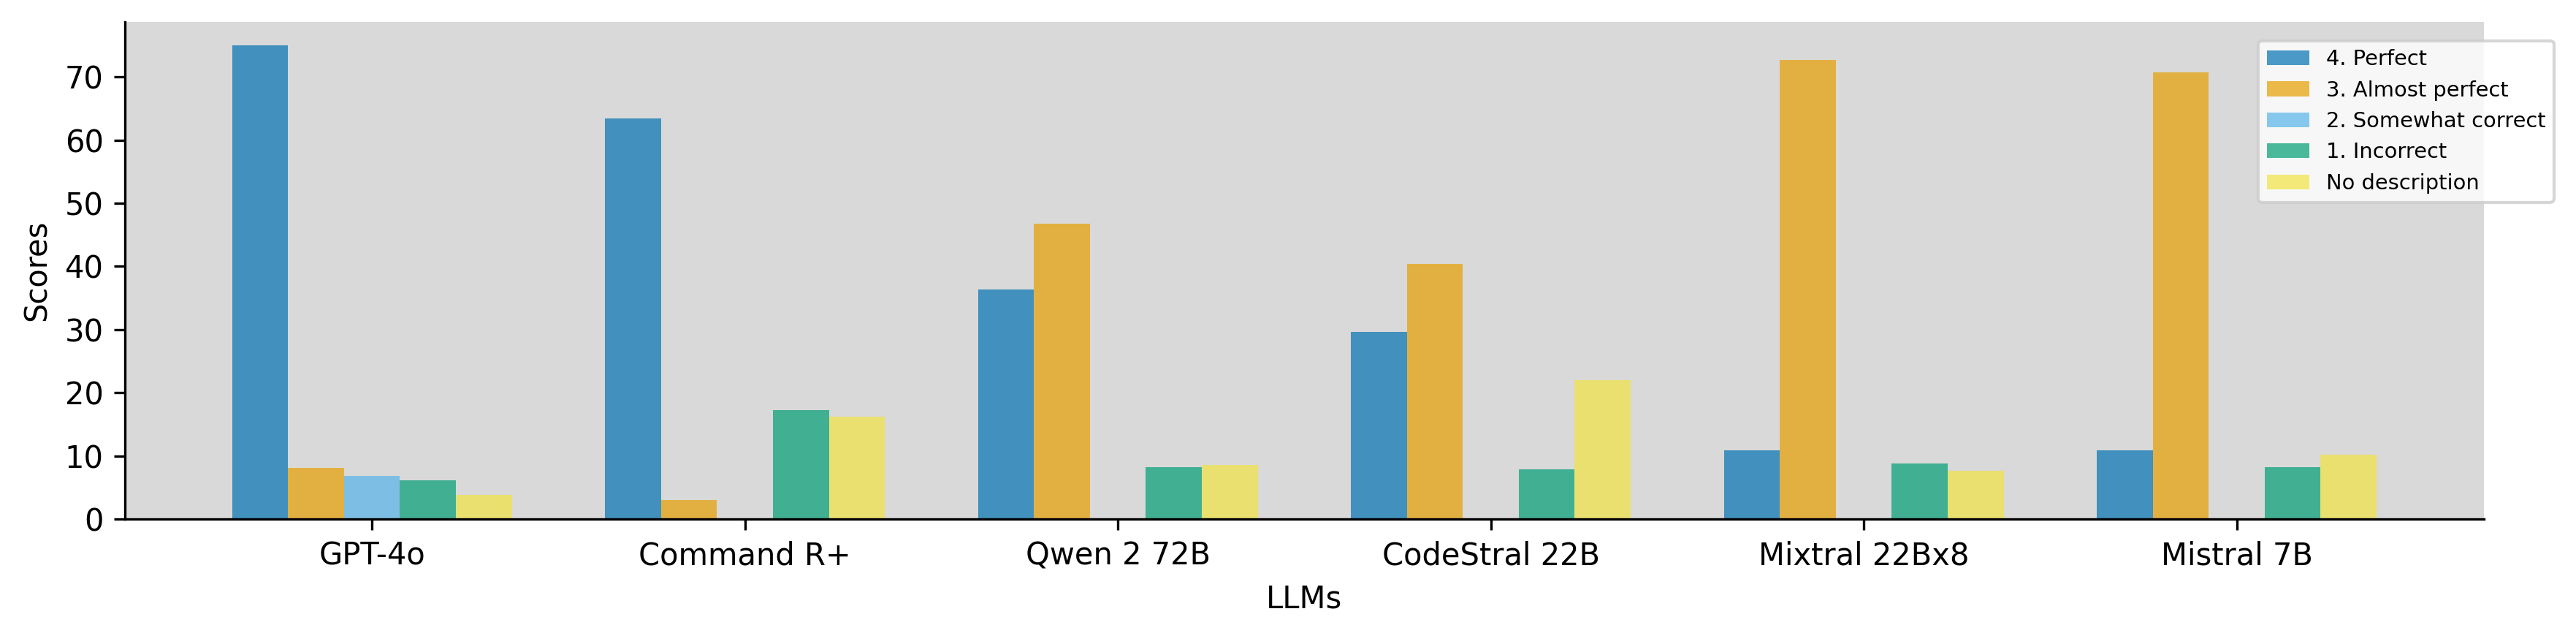

In [157]:
# Define the new order of the models
new_order = [0, 1, 4, 5, 2, 3]
reordered_data = data[:, [0, 1, 4, 2, 3, 2]]
reordered_models = ["GPT-4o", "Command R+", "Qwen 2 72B", "CodeStral 22B", "Mixtral 22Bx8", "Mistral 7B"]

# Reorganize data for the new plot structure
data_transposed = reordered_data.T  # Transpose the data to switch rows and columns

x = np.arange(len(reordered_models))  # the label locations
width = 0.15  # the width of the bars

# Color palette suitable for colorblind individuals with alpha for transparency
colors = ['#0072B2', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#D55E00']
alpha_value = 0.7  # Set alpha for transparency

fig, ax = plt.subplots(figsize=(12, 3))
rects1 = ax.bar(x - 2*width, data_transposed[0], width, label='4. Perfect', color=colors[0], alpha=alpha_value)
rects2 = ax.bar(x - width, data_transposed[1], width, label='3. Almost perfect', color=colors[1], alpha=alpha_value)
rects3 = ax.bar(x, data_transposed[2], width, label='2. Somewhat correct', color=colors[2], alpha=alpha_value)
rects4 = ax.bar(x + width, data_transposed[3], width, label='1. Incorrect', color=colors[3], alpha=alpha_value)
rects5 = ax.bar(x + 2*width, data_transposed[4], width, label='No description', color=colors[4], alpha=alpha_value)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('LLMs')
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(reordered_models)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.8), fontsize='x-small')

# Set background color only inside the axes to a darker grey
ax.set_facecolor('#d9d9d9')

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

plt.show()
